#                           PROJECT TOPIC
## Wildfires in Brazil

### Problem Statement
Wildfires in Brazil Amazon
Our Topic of Project is to show the the wildfires
Calamity happened in the states of Brazil. Through the
Data Analysis on the wildfires data taken from
kaggle ,we can tell the cause of the wildfires and what
measure government or UN bodies must take prevent
these wildfires. Objectives:- Forest Fires are a serious problem for the prevention of
the tropical forest. Understanding the frequency of the
forest fires in the time series can help to take action to
prevent them

### Steps to followed for analysis and visualization:-
##### i. Firt we took data as csv or excel format
##### ii. We import the data as dataframe format with the help of pandas module.
##### iii. Then clean the data such as , NA values , values having errors or any data type issues
##### iv. Then do some calculations to get some useful data to represent it visualy the data.
##### v. We import some modules e.g. matplotlib, plotly , seaborn for the visualization purpose to draw bar graph, line , scatter plot etc.
##### vi. finally visualize the data with the help of corresponding figures and chart by using functions and classes of modules.  
### SOURCE 
https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil

#### Data :
##### Year , State , month , number (no. of fires) , Date(date of fire).
##### these are the columns present in the data sets.
#### Here , we're going to analyze the data by state ,by year, max fires in year state wise by period and by "season" and so on.


here we imported the the useful modules 

In [123]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
import seaborn as sns
import plotly.express as px

Reading data from excel file

In [124]:
Data=pd.read_excel("amazon.xlsx",header = 0,na_values=0)
df=Data.copy()
df.drop('date',axis=1,inplace=True)
df.head(10)

,year,state,month,number
0,1998,Acre,January,NaN
1,1999,Acre,January,NaN
2,2000,Acre,January,NaN
3,2001,Acre,January,NaN
4,2002,Acre,January,NaN
5,2003,Acre,January,10.0
6,2004,Acre,January,NaN
7,2005,Acre,January,12.0
8,2006,Acre,January,4.0
9,2007,Acre,January,NaN


Here we remove the NA values and the values which is less than 10 to make data consistent

In [125]:
df.dropna(inplace=True)
df=df[df['number']>10]
df=df.astype({'number':'int','year':'str'})
state=df['state'].unique()
df.head()

,year,state,month,number
7,2005,Acre,January,12
18,2016,Acre,January,12
42,2000,Acre,March,11
75,2013,Acre,April,19
98,2016,Acre,May,21


Resetting the indexes 

In [126]:
df.reset_index(drop=True,inplace=True)

Now , we have to calculate the data in a proper way to represent it

Here in this case we want to calculate the number of fires  as per the states

In [127]:
group_by_state = df .groupby('state', as_index = False).agg({'number' : 'sum'}).sort_values('number', ascending = True,inplace=False).reset_index(drop=True)
max_sum=group_by_state['number'].max()
group_by_state.head()

,state,number
0,Sergipe,2939
1,Distrito Federal,3315
2,Alagoas,4355
3,Espirito Santo,6095
4,Acre,18165


In [128]:
grp_stt=group_by_state['state'].to_list()
grp_sum=group_by_state['number'].to_list()

In [129]:
df.head()

,year,state,month,number
0,2005,Acre,January,12
1,2016,Acre,January,12
2,2000,Acre,March,11
3,2013,Acre,April,19
4,2016,Acre,May,21


we add up a column for month num which defines the months in numeric form

In [130]:
months = Data.month.unique()
display(months)
months_num = np.arange(1,13)

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [131]:
months_transform = {mon:mon_num for mon, mon_num in zip(months, months_num)}
df['month_num'] = df['month'].map(months_transform)

In [132]:
df.head()

,year,state,month,number,month_num
0,2005,Acre,January,12,1
1,2016,Acre,January,12,1
2,2000,Acre,March,11,3
3,2013,Acre,April,19,4
4,2016,Acre,May,21,5


Here we add up two more columns named longitude & latitude for mapping the coordinates on geographical through which we can visualize data in more dynamic way

In [133]:
latitude={
    'Acre':-9.02,'Alagoas':-9.57,'Amapa':-2.05,'Amazonas':-5.00 ,'Bahia':-12.00,'Ceara':-5.00,
          
          'Distrito Federal':-15.45,'Espirito Santo':-20.00,'Goias':-15.55,'Maranhao':-5.00,'Mato Grosso':-14.00
          
          ,'Minas Gerais':-18.50,'Pará':-3.20,'Paraiba':-7.00,'Pernambuco':-8.00,'Piau':-7.00,'Rio':-22.90,
          
          'Rondonia':-11.00,'Roraima':-2.00,'Santa Catarina':-27.25,'Sao Paulo':-23.32,'Sergipe':-10.30,
         
         'Tocantins':-10.00
         }

longitude={
    'Acre':-70.8120,'Alagoas':-36.7820,'Amapa':-50.50,'Amazonas':-65.00,'Bahia':-42.00,'Ceara':-40.00,
    
    'Distrito Federal':-47.45,'Espirito Santo':-40.45,'Goias':-50.10,'Maranhao':-46.00,'Mato Grosso':-55.00,
    
    'Minas Gerais':-46.00,'Pará':-52.00,'Paraiba':-36.00,'Pernambuco':-37.00,'Piau':-73.00, 'Rio':-43.17,
    
    'Rondonia':-63.00,'Roraima':-61.30,'Santa Catarina':-48.30,'Sao Paulo':-46.37,'Sergipe':-37.30,
    
    'Tocantins':-48.00
}
df['latitude'] = df['state'].map(latitude)
df['longitude'] = df['state'].map(longitude)

#### mapping the latitude and longitude as per the states of the brazil for the later  vizualization purpose

In [134]:
df.head()

,year,state,month,number,month_num,latitude,longitude
0,2005,Acre,January,12,1,-9.02,-70.812
1,2016,Acre,January,12,1,-9.02,-70.812
2,2000,Acre,March,11,3,-9.02,-70.812
3,2013,Acre,April,19,4,-9.02,-70.812
4,2016,Acre,May,21,5,-9.02,-70.812


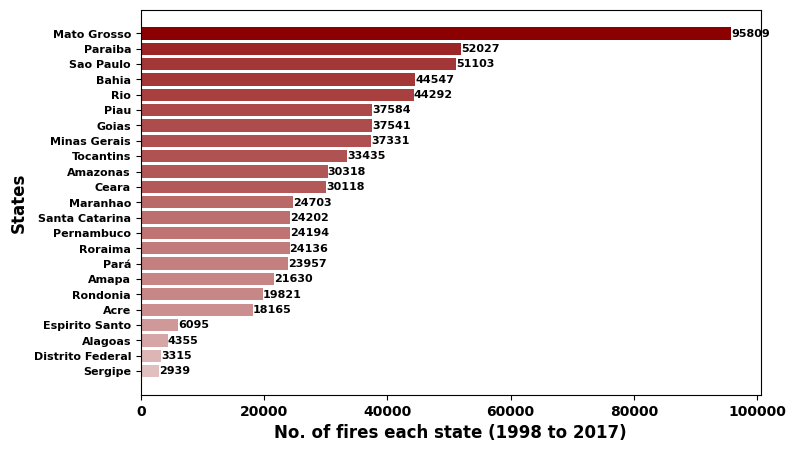

In [135]:
fig,ax=plt.subplots(figsize=(8,5))

# list of Alpha for the opacity of bars to fade out as the value decr. in barH

Alpha=[0.25,0.29,0.35,0.4,0.44,0.47,0.48,0.50,0.52,0.55,0.57,0.59,0.65,0.66,0.68,0.69,0.70,0.71,0.75,0.78,0.79,0.85,1]
plt.barh(grp_stt,grp_sum,color=[to_rgba('darkred',alpha=s)for s in Alpha])
plt.ylabel('States',fontsize=12,weight='bold',color='black')
plt.yticks(size=8,weight="bold")
plt.xlabel("No. of fires each state (1998 to 2017)",size=12,weight='bold',color='black')
plt.xticks(size=10,weight="bold")
ax.bar_label(ax.containers[0],weight="bold",size=8)
plt.grid(False)
plt.show()

# calculations

by_state = df.groupby('state', as_index = False).agg({'number' : 'sum'}).sort_values('number', ascending = False)
by_state['latitude'] = by_state['state'].map(latitude)
by_state['longitude'] = by_state['state'].map(longitude)

# viz
fig = px.scatter_geo(data_frame= by_state, scope='south america',lat = 'latitude',lon = 'longitude',size= 'number' , color = 'state', projection= 'hammer', hover_name = 'state')
fig.update_layout(title = dict(text='Fires by state',x=0.5,font=dict(color='black',size=24)))
fig.show()

Now we calculate the number of fired each year by using aggregate function to calculate the no. of fires for each year

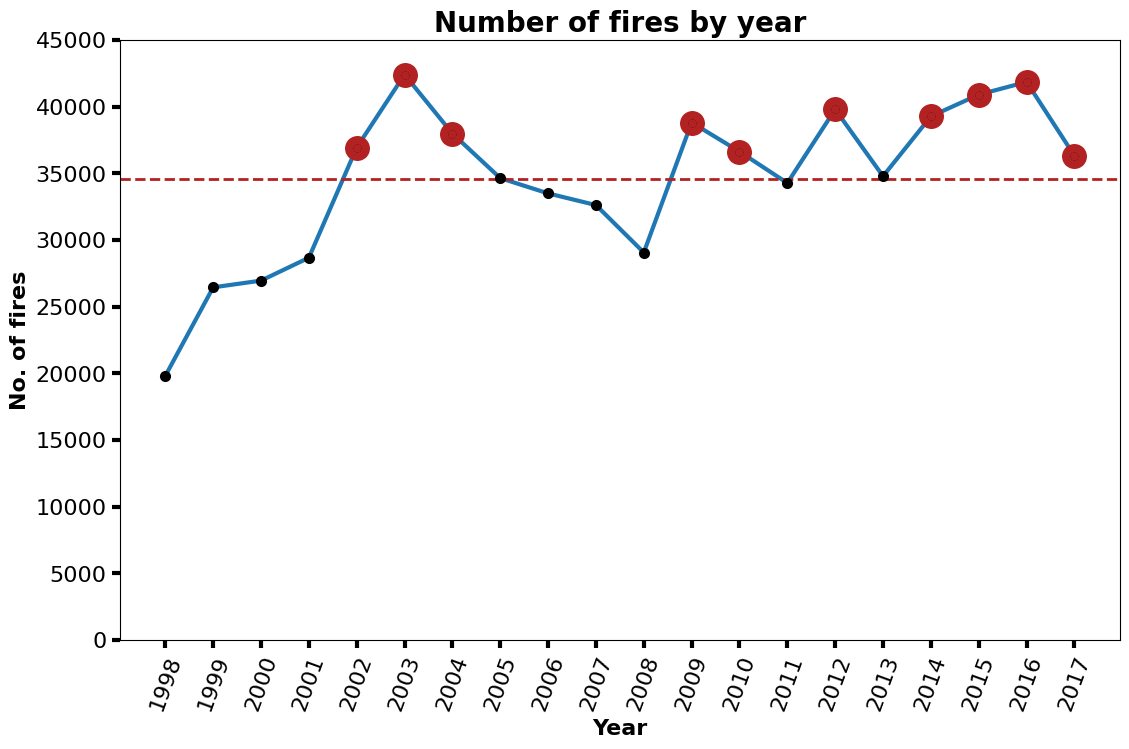

In [136]:
# calculation for grouping by year

group_by_year = df.groupby('year', as_index = False).agg({'number' : 'sum'}).reset_index().drop('index', axis = 1)

# viz

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.lineplot(x = group_by_year['year'], y = group_by_year['number'], lw = 3)
plt.scatter(x = group_by_year['year'] , y = group_by_year['number'], color = 'black', zorder = 3, lw = 2)

# Scatter plt for ten major years where fire is more than avg.

major_year=group_by_year[['year','number']].nlargest(10,columns='number').sort_values(by='number',ascending=True)
plt.scatter(x =major_year['year'] , y =major_year['number'] , color = 'firebrick', zorder = 3, lw = 12)
plt.axhline(y = group_by_year['number'].mean(), color = 'firebrick', ls = '--', lw = 2,)

# ticks

plt.xticks(rotation=70)
plt.yticks(range(0, 45001, 5000))
plt.tick_params(direction='out', length=6, width=3, colors='black', grid_color='black', labelsize = 16)

# labels

plt.xlabel('Year', color = 'black', fontsize = 16, fontweight = 'bold')
plt.ylabel('No. of fires', color = 'black', fontsize = 16, fontweight = 'bold')

# title

plt.title('Number of fires by year', color = 'black', fontsize = 20,
fontweight = 'bold')
plt.grid(False)
plt.show()

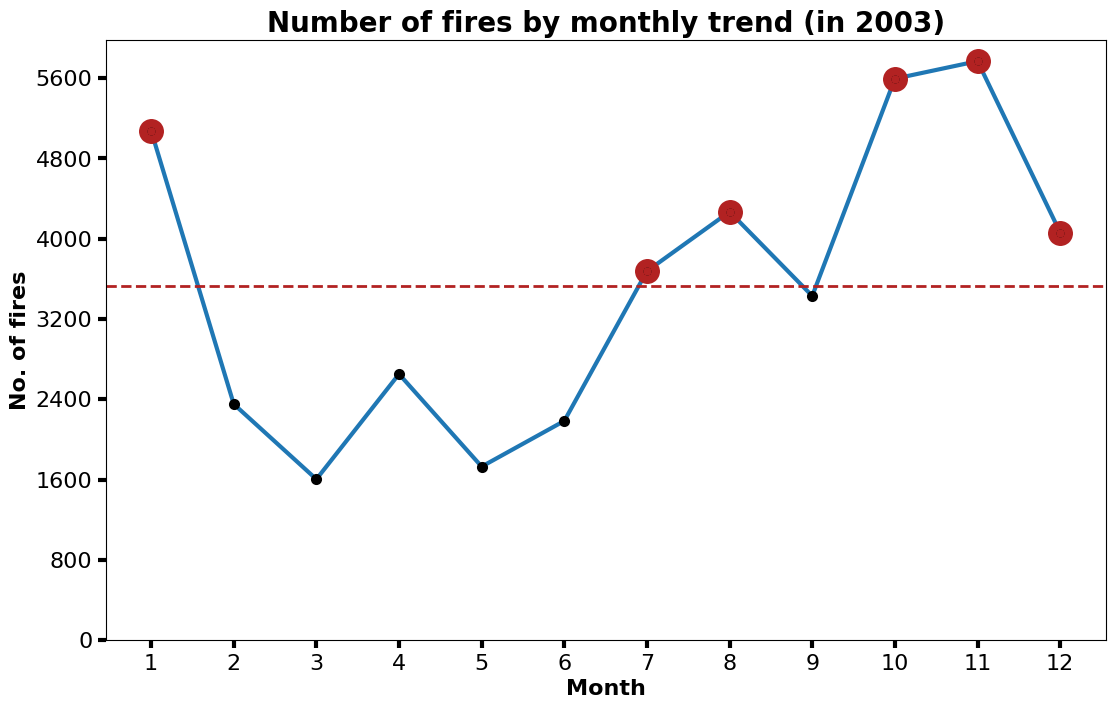

In [137]:
# calculations for months in 2003
by_monthN_2003 = df.query('year == "2003"').groupby('month_num', as_index = False).agg({'number' : 'sum'}).sort_values('month_num', ascending = True)

# viz
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.lineplot(x = by_monthN_2003['month_num'].astype(str), y = by_monthN_2003['number'], lw = 3)
plt.scatter(x = by_monthN_2003['month_num'].astype(str) , y = by_monthN_2003['number'], color = 'black', zorder = 3, lw = 2)

# Scatter plt for ten major years where fire is more than avg.

major_month=by_monthN_2003[['month_num','number']].nlargest(6,columns='number').sort_values(by='number',ascending=True)
plt.scatter(x =major_month['month_num'].astype(str) , y =major_month['number'] , color = 'firebrick', zorder = 3, lw = 12)
plt.axhline(y = by_monthN_2003['number'].mean(), color = 'firebrick', ls = '--', lw = 2,)

# ticks

plt.yticks(range(0, 6000, 800))
plt.tick_params(direction='out', length=6, width=3, colors='black', grid_color='black', labelsize = 16)

# labels

plt.xlabel('Month', color = 'black', fontsize = 16, fontweight = 'bold')
plt.ylabel('No. of fires', color = 'black', fontsize = 16, fontweight = 'bold')

# title

plt.title('Number of fires by monthly trend (in 2003)', color = 'black', fontsize = 20,
fontweight = 'bold')
plt.grid(False)
plt.show()



### Calculation of visual representation of the year's in which max. no. of fires occured. 

we have shown the states where maximum fire occured in year 2003 and 2016

In [150]:
# calculations for year 2003
by_state_2003 = df.query('year == "2003"').groupby('state', as_index = False).agg({'number' : 'sum'}).sort_values('number', ascending = False)
by_state_2003['latitude'] = by_state_2003['state'].map(latitude)
by_state_2003['longitude'] = by_state_2003['state'].map(longitude)

# viz
fig1 = px.scatter_geo(data_frame= by_state_2003, scope='south america',lat = 'latitude',lon = 'longitude',size= 'number' , color = 'state', projection= 'hammer', hover_name = 'state')
fig1.update_layout(title = dict(text='Fires in 2003 by state',x=0.5,font=dict(color='black',size=24)))
fig1.show()

# Calculation for year 2016
by_state_2016 = df .query('year == "2016"').groupby('state', as_index = False).agg({'number' : 'sum'}).sort_values('number', ascending = False)
by_state_2016['latitude'] = by_state_2016['state'].map(latitude)
by_state_2016['longitude'] = by_state_2016['state'].map(longitude)

# vizual of Figure 2 of (2016)
fig2 = px.scatter_geo(data_frame= by_state_2016, scope='south america',lat = 'latitude',lon = 'longitude',size= 'number' , color = 'state', projection= 'hammer', hover_name = 'state')
fig2.update_layout(title = dict(text='Fires in 2016 by state',x=0.5,font=dict(color='black',size=24)))
fig2.show()

In [139]:
max_fire_stt=df.query('state== "Mato Grosso"').groupby('year', as_index = False).agg({'number' : 'sum'}).sort_values('year', ascending = True)
max_fire_stt.head()

,year,number
0,1998,2392
1,1999,2954
2,2000,3872
3,2001,3052
4,2002,3626


Here now we know that the mat grosso state having the maximum fires as per the state now we can calculate what is the total no. of fires each year in MAto Grosso State

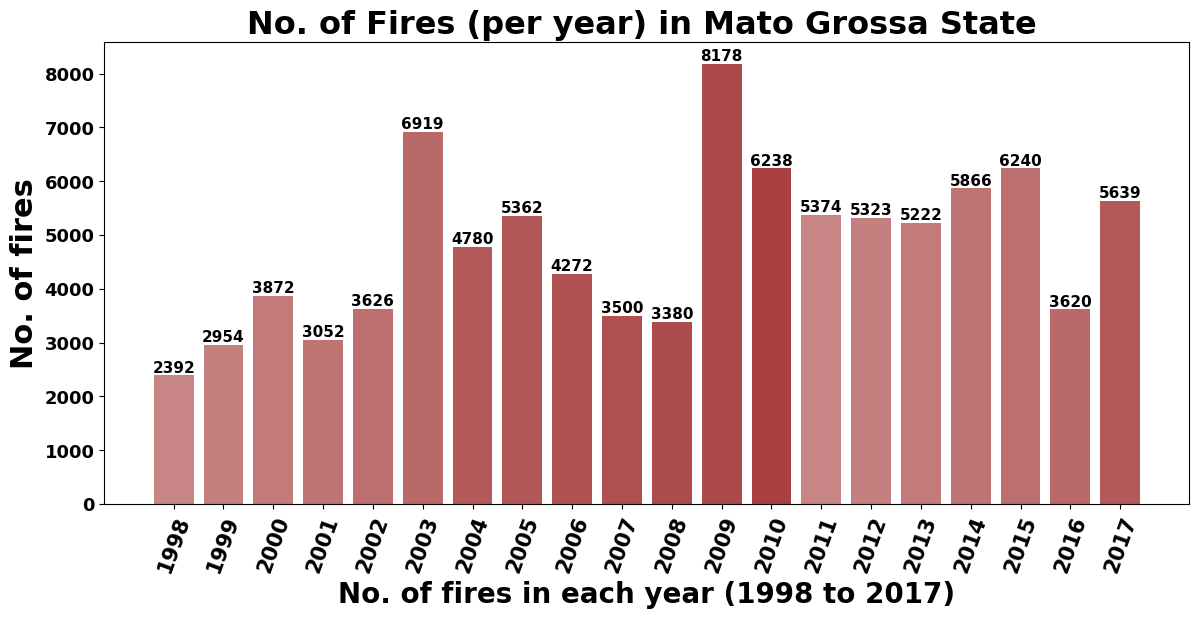

In [140]:
fig,ax=plt.subplots(figsize=(14,6))

# list of Alpha for the opacity of bars to fade out as the value decr. in barH

Alpha=[0.48,0.50,0.52,0.55,0.57,0.59,0.65,0.66,0.68,0.69,0.70,0.71,0.75]
plt.bar(max_fire_stt['year'],max_fire_stt['number'],color=[to_rgba('darkred',alpha=s)for s in Alpha],lw=2,)
plt.ylabel('No. of fires',fontsize=22,weight='bold',color='black')
plt.xlabel("No. of fires in each year (1998 to 2017)",size=20,weight='bold',color='black')

# ticks
plt.yticks(size=13,weight="bold")
plt.xticks(size=15,weight="bold",rotation=70)
ax.bar_label(ax.containers[0],weight="bold",size=11) # bar label is for labelling each bar in the bargraph
plt.title('No. of Fires (per year) in Mato Grossa State ',size=23,weight='bold')
plt.grid(False)

plt.show()

Here , in the below section 
we have add up the columns seasons and half years to show the data grouped by seasons and halves of each year

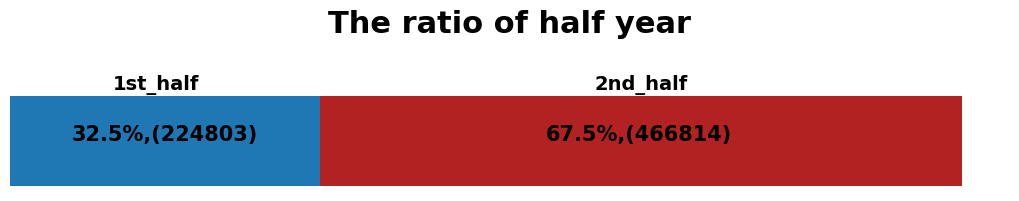

In [141]:
# lists

seasons = []
half_years = []

# cycles

for i in df['month']:
    if i in ['May', 'June', 'July','August']:
        season = 'Summer'
    elif i in ['March','April']:
        season = 'Spring'
    elif i in ['December', 'January', 'February']:
        season = 'Winter'
    else:
        season = 'Autumn'
    seasons.append(season)

for i in df['month']:
    if i in ['January','February','March', 'April', 'May', 'June']:
        half_year = '1st_half'
    else:
        half_year = '2nd_half'
    half_years.append(half_year)

# columns

df['season'] = seasons
df['half_year'] = half_years

# calculations

group_by_half_year = df.groupby('half_year', as_index = False).agg({'number' : 'sum'})
group_by_half_year['percentage'] = round(group_by_half_year['number'] / sum(group_by_half_year['number']) * 100, 2)

# fig

fig = plt.figure(figsize = (10,1))
ax1 = fig.add_axes([0, 0, 1, 1])

# barh
ax1.barh(width = group_by_half_year['percentage'][0] + group_by_half_year['percentage'][1], y = 0, color = 'firebrick')
ax1.barh(width = group_by_half_year['percentage'][0], y = 0)

# group_name
ax1.text(group_by_half_year['percentage'][0]/3, 0.45, f"{group_by_half_year['half_year'][0]}", color = 'black', fontsize = 14, fontweight = 'bold')
ax1.text(group_by_half_year['percentage'][1]/1.1, 0.45, f"{group_by_half_year['half_year'][1]}", color = 'black', fontsize = 14, fontweight = 'bold')

# # group_percentage
ax1.text(group_by_half_year['percentage'][0]/5, 0, f"{group_by_half_year['percentage'][0]}%,({group_by_half_year['number'][0]})", color = 'black', fontsize = 15, fontweight = 'bold')
ax1.text( group_by_half_year['percentage'][1]/1.2, 0, f"{group_by_half_year['percentage'][1]}%,({group_by_half_year['number'][1]})", color = 'black', fontsize = 15, fontweight = 'bold')

# axis
ax1.axis('off')

# # title
plt.title('The ratio of half year',y= 1.5, color = 'black', fontsize = 22, fontweight = 'bold')

plt.show()

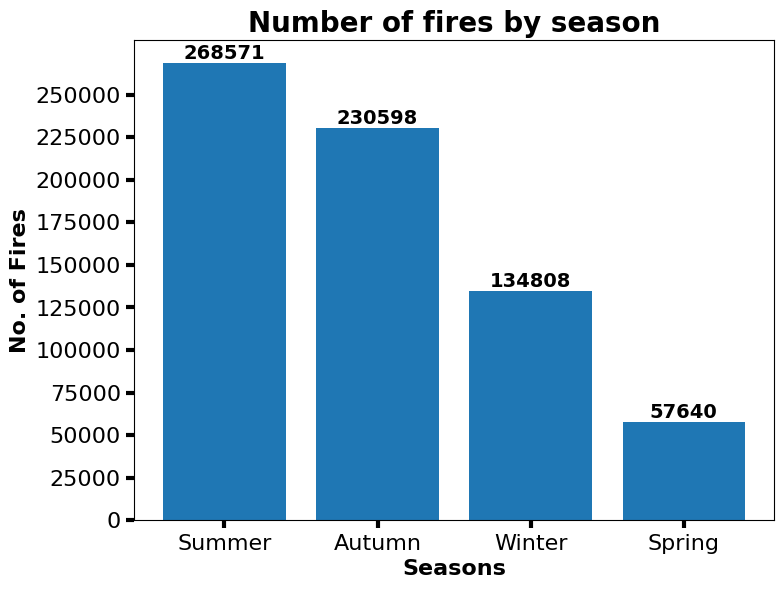

In [142]:
# calculations
group_by_season = df.groupby('season', as_index = False).agg({'number' : 'sum'}).sort_values('number', ascending = False)

# viz

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

# chart
ax.bar(x = group_by_season['season'], height = group_by_season['number'])
plt.xlabel('Seasons',weight='bold',size=16)
plt.ylabel('No. of Fires',weight='bold',size=16)

# annotate
ax.bar_label(ax.containers[0],weight="bold",size=14)

# ticks
plt.yticks(range(0, 250001, 25000))
plt.tick_params(direction='out', length=6, width=3, colors='black', grid_color='black', labelsize = 16)

# title
plt.title('Number of fires by season', fontsize = 20, fontweight = 'bold')
plt.grid(False)
plt.show()

In [143]:
# calculations for summer

by_state_summer = df.query('season == "Summer"').groupby('state', as_index = False).agg({'number' : 'sum'})

# calculations for location
by_state_summer['latitude'] = by_state_summer['state'].map(latitude)
by_state_summer['longitude'] = by_state_summer['state'].map(longitude)

# viz

fig1 = px.scatter_geo(data_frame= by_state_summer, scope='south america',lat = 'latitude',lon = 'longitude',size= 'number' , color = 'state', projection= 'hammer', hover_name = 'state')
fig1.update_layout(title = dict(text='Fires in Summer season',x=0.5,font=dict(
color='black',size=24)))
fig1.show()

Now we calculate the no fires occured in each month of all the years and aggregate the data according and represent it as state wise :

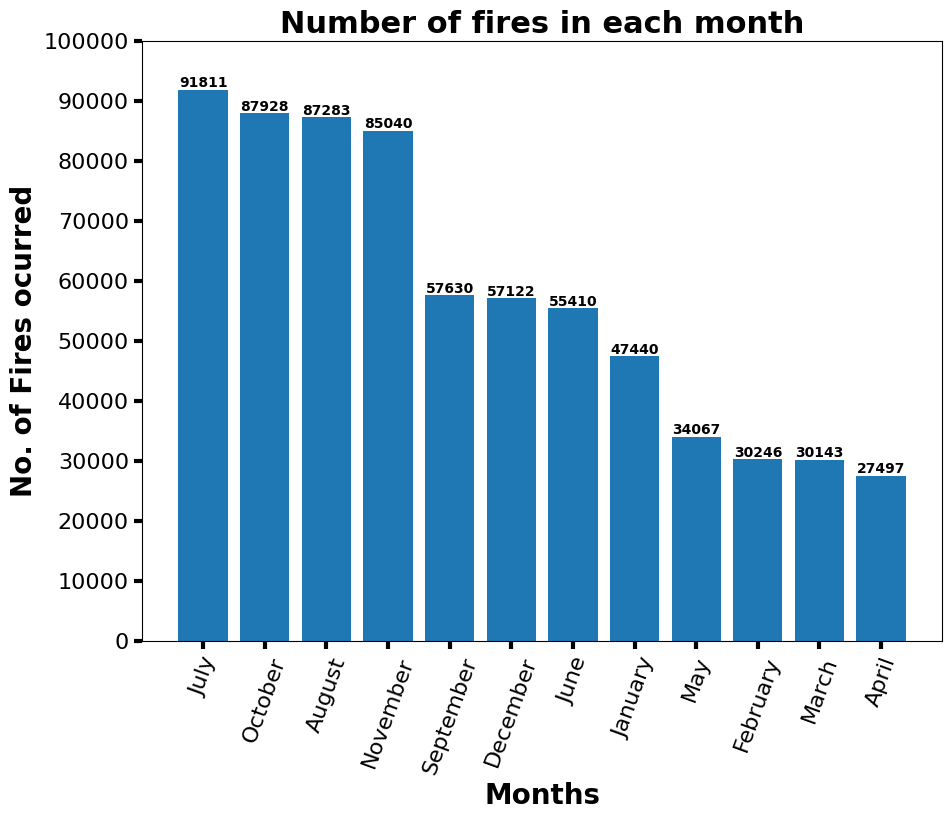

In [147]:
# calculations
group_by_month = df.groupby('month', as_index = False).agg({'number' : 'sum'}).sort_values('number',ascending=False)

# viz
fig = plt.figure(figsize = (8,6))
ax = fig.add_axes([0, 0, 1, 1])

# chart
ax.bar(x = group_by_month.month.unique(), height = group_by_month['number'])

# annotate 
ax.bar_label(ax.containers[0],weight="bold",size=10)
plt.xlabel('Months',weight='bold',size=20)
plt.ylabel('No. of Fires ocurred',weight='bold',size=20)

# ticks
plt.xticks(rotation=70)
plt.yticks(range(0, 100001, 10000))
plt.tick_params(direction='out', length=6, width=3, colors='black', grid_color='black', labelsize = 16)

# title
plt.title('Number of fires in each month', color = 'black', fontsize = 22, fontweight = 'bold')
plt.grid(False)
plt.show()

As from the bar chart we have just shown we get to know that July is month in whuch maximum fires occured.

So lets calculate the no . of fires of each state in july month of all the years.
Also shown the geographical chart representing it.

In [145]:
# calculations for July
by_state_july = df.query('month == "July"').groupby('state', as_index = False).agg({'number' : 'sum'})
# calculations for location
by_state_july['latitude'] = by_state_2003['state'].map(latitude)
by_state_july['longitude'] = by_state_2003['state'].map(longitude)

# viz
fig1 = px.scatter_geo(data_frame= by_state_july, scope='south america',lat = 'latitude',lon = 'longitude',size= 'number' , color = 'state', projection= 'hammer', hover_name = 'state')
fig1.update_layout(title = dict(text='Fires in July by state',x=0.5,font=dict(
color='black',size=24)))
fig1.show()


## Conclusion: 
### After examining the data we have concluded or found these info's about the wildfires:
##### 1.State with the most fires - Mato Grosso;
##### 2.The largest number of fires was in 2003, 2015 and 2016, during these years there were different top 3 states by the number of fires;
##### 3.Almost 2/3 of the fires occurred in the second half of the year, the top 5 states, depending on the half of the year, are different;
##### 4.The greatest number of fires was in summer and autumn;
##### 5.The highest number of fires was in July.